### Logistic Regression: An Overview

Logistic Regression is a statistical method used primarily for binary classification problems, though it can be extended for multi-class classification. It’s a linear model similar to Linear Regression, but the output is transformed using a logistic or sigmoid function, which limits the predictions to a probability range of 0 and 1. This makes it useful for classification tasks, where we can interpret probabilities and make a binary decision.

### Why Use Logistic Regression?

Logistic Regression is widely used because:
1. **Simplicity**: It’s easier to interpret, implement, and train.
2. **Probabilistic**: Outputs probabilities for each class, which can help with decision-making.
3. **Computational Efficiency**: Suitable for high-dimensional datasets.
4. **Feature Interpretability**: Coefficients offer insights into feature importance.

### Types of Logistic Regression

1. **Binary Logistic Regression**: Used when there are only two possible outcomes (e.g., spam or not spam).
2. **Multinomial Logistic Regression**: Used when there are more than two categories (e.g., predicting types of cuisine).
3. **Ordinal Logistic Regression**: Used when the outcomes have an order (e.g., rating a product on a scale from 1 to 5).

### Logistic Regression Formula

The logistic function is defined as:
\[
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n)}}
\]
Where:
- \( P(Y=1|X) \) is the probability of the outcome (class 1) given input \( X \).
- \( \beta_0 \) is the intercept, and \( \beta_i \) are the coefficients for each predictor \( X_i \).

## Examples of Logistic Regression


Suppose we have a dataset of customers, and our goal is to predict whether a customer will default on their loan based on variables like income and age.

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Simulate a dataset
data = {
    'income': [50000, 60000, 55000, 52000, 70000, 75000, 80000, 67000, 71000, 45000],
    'age': [22, 25, 24, 23, 28, 30, 33, 26, 27, 21],
    'default': [0, 0, 1, 0, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Preparing data
X = df[['income', 'age']]
y = df['default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting and evaluating
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
```

**Visualization of Decision Boundary**:
We can visualize the decision boundary in 2D if only two features are used.

```python
import numpy as np
import matplotlib.pyplot as plt

# Define the grid
x_min, x_max = X['income'].min() - 5000, X['income'].max() + 5000
y_min, y_max = X['age'].min() - 2, X['age'].max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 500), np.arange(y_min, y_max, 1))

# Predict probabilities and reshape
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and scatter
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X['income'], X['age'], c=y, edgecolor='k', s=100)
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Decision Boundary for Loan Default Prediction')
plt.show()
```

### Example 2: Multinomial Logistic Regression - Predicting Favorite Cuisine

In this case, we predict the favorite cuisine type (e.g., Italian, Chinese, Mexican) based on variables like age and city.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Sample dataset
data = {
    'age': [25, 32, 40, 23, 35, 29, 31, 45, 34, 28],
    'city': ['NY', 'SF', 'NY', 'LA', 'LA', 'SF', 'SF', 'LA', 'NY', 'NY'],
    'cuisine': ['Italian', 'Mexican', 'Chinese', 'Italian', 'Chinese', 'Mexican', 'Italian', 'Mexican', 'Chinese', 'Italian']
}
df = pd.DataFrame(data)

# Encoding categorical variables
le = LabelEncoder()
df['city'] = le.fit_transform(df['city'])
df['cuisine'] = le.fit_transform(df['cuisine'])

# Prepare data
X = df[['age', 'city']]
y = df['cuisine']

# Multinomial Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

# Predicting
y_pred = model.predict(X)
print("Predicted Cuisines:", y_pred)
```

### Pros and Cons of Logistic Regression

**Pros**:
1. **Simplicity and Interpretability**: Easy to implement and understand.
2. **Less Prone to Overfitting**: Works well for linear data.
3. **Efficient**: Quick to train on smaller datasets.

**Cons**:
1. **Not Suitable for Complex Relationships**: Assumes a linear relationship between variables and log-odds.
2. **Sensitive to Outliers**: May affect accuracy.
3. **Cannot Handle Non-linearly Separable Data Well**: Struggles with complex data structures.

### Use Cases for Logistic Regression

Logistic Regression is particularly useful for:
1. **Binary Classification Problems**: Fraud detection, spam filtering, and medical diagnoses.
2. **Situations with Probabilistic Interpretation**: Where we need class probabilities, like customer churn prediction.
3. **Simple Decision-Making Scenarios**: Where interpretability is a priority.

### Types of Logistic Regression with Code Examples

#### 1. Binary Logistic Regression

As demonstrated in Example 1 above, binary logistic regression is used when the target variable has only two classes.

#### 2. Multinomial Logistic Regression

Multinomial logistic regression (used in Example 2) extends to cases with more than two outcome categories. The model learns to classify among multiple categories by fitting probabilities for each class.

#### 3. Ordinal Logistic Regression

For ordinal logistic regression, we typically use specialized libraries like `statsmodels`. Here’s a small example using synthetic data.

```python
import pandas as pd
import statsmodels.api as sm

# Example data
data = {
    'age': [23, 45, 34, 25, 28, 36, 30, 40],
    'income': [50000, 100000, 75000, 45000, 62000, 88000, 54000, 92000],
    'satisfaction_level': [1, 3, 2, 1, 2, 3, 1, 3]
}
df = pd.DataFrame(data)

# Define the dependent and independent variables
X = df[['age', 'income']]
y = df['satisfaction_level']

# Fit an Ordinal Logistic Regression model
X = sm.add_constant(X)
model = sm.MNLogit(y, X)
result = model.fit()

# Print summary
print(result.summary())
```

Ordinal logistic regression is used when dealing with ordinal data, like satisfaction ratings. Here, higher ratings have greater value but are not quantitatively comparable (e.g., a satisfaction level of 3 is not exactly three times a level of 1).

### Visualization for Binary Logistic Regression with a Single Variable

To visualize a binary logistic regression model, you can plot the probability curve:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Simulate data
X = np.array([20, 25, 30, 35, 40, 45, 50]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 1, 1, 1])

# Logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Prediction line
X_test = np.linspace(15, 55, 200).reshape(-1, 1)
y_prob = model.predict_proba(X_test)[:, 1]

plt.plot(X_test, y_prob, label="Probability Curve")
plt.scatter(X, y, c='red', label="Data Points")
plt.xlabel("Age")
plt.ylabel("Probability of Outcome = 1")
plt.legend()
plt.title("Binary Logistic Regression Probability Curve")
plt.show()
```

### Conclusion

Logistic Regression is

 a versatile tool for binary and multiclass classification problems, offering a balance between simplicity, interpretability, and predictive power in the right contexts. For complex or non-linear data, other models like decision trees, random forests, or neural networks may be more effective.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


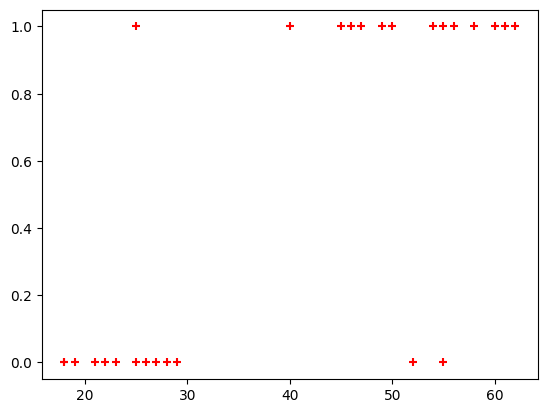

In [3]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size = 0.2)

In [5]:
len(X_train)
#len(X_test)

21

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
X_test

,age
14,49
7,60
17,58
4,46
5,56
3,52


In [9]:
model.predict([[50]])

C:\Users\Al hamad\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [10]:
model.predict_proba(X_test)

array([[0.17104476, 0.82895524],
       [0.03998454, 0.96001546],
       [0.05277454, 0.94722546],
       [0.24198665, 0.75801335],
       [0.06936015, 0.93063985],
       [0.11767194, 0.88232806]])

In [11]:
model.score(X_test, y_test)

0.8333333333333334

In [12]:
model.coef_

array([[0.14547415]])

In [13]:
model.intercept_

array([-5.54999258])

**Lets defined sigmoid function now and do the math with hand**

In [14]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [15]:
def prediction_function(age):
   #z = coefficent * age - intercept
    z = 0.1145007 * age - 4.36406431
    y = sigmoid(z)
    return y
    

In [16]:
X_test

,age
14,49
7,60
17,58
4,46
5,56
3,52


In [17]:
age = 22
prediction_function(age)

0.13645526038951292

## Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work).


1- Plot bar charts showing impact of employee salaries on retention

2- Plot bar charts showing corelation between department and employee retention

3- Now build logistic regression model using variables that were narrowed down in step 1

4- Measure the accuracy of the model

In [18]:
hr = pd.read_csv('hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [20]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [21]:
hr.shape

(14999, 10)

In [22]:
left = hr[hr.left==1]
left.shape

(3571, 10)

In [23]:
retained = hr[hr.left==0]
retained.shape

(11428, 10)

In [24]:
hr.left.shape

(14999,)

**Average numbers for all columns**

In [25]:
hr_new = hr.select_dtypes(include=[np.number]) 
result_hr = hr_new.groupby(hr['left']).mean() 
result_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.0,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,1.0,0.005321


In [26]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Impact of salary on employee retention.**

<Axes: xlabel='salary'>

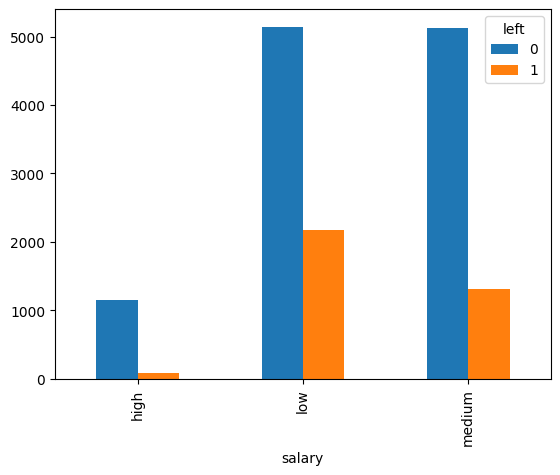

In [27]:
pd.crosstab(hr.salary, hr.left).plot(kind='bar')

**Department wise employee retention rate**

<Axes: xlabel='Department'>

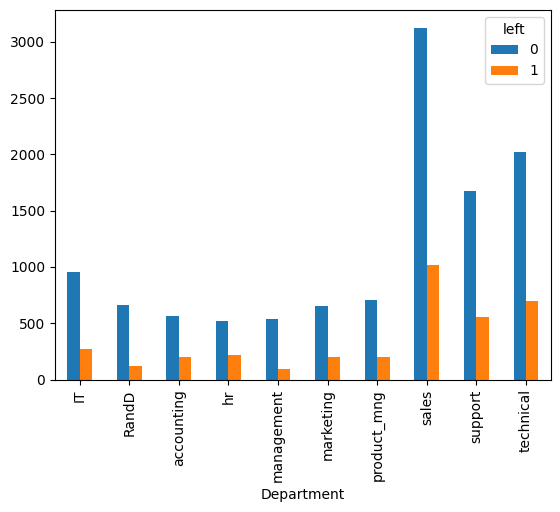

In [28]:
pd.crosstab(hr.Department, hr.left).plot(kind='bar')

### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1- Satisfaction Level

2- Average Monthly Hours

3- Promotion Last 5 Years

4- Salary

In [29]:
sub_hr = hr[["satisfaction_level", "average_montly_hours", "promotion_last_5years", "salary" ]]
sub_hr.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [30]:
dummies_salary = pd.get_dummies(sub_hr.salary, prefix="salary", dtype=int)
hr_with_dummies = pd.concat([sub_hr, dummies_salary],axis='columns')
hr_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [31]:
hr_with_dummies.drop('salary', axis='columns', inplace=True)
hr_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [32]:
X = hr_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [33]:
y = hr.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
hr_model = LogisticRegression()
hr_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
hr_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
hr_model.score(X_test, y_test)

0.782952380952381

### Example 
**Binary Logistic Regression -**

In [37]:
ads = pd.read_csv("Social_Network_Ads.csv")
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [38]:
ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [39]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [40]:
ads.shape

(400, 5)

In [41]:
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [42]:
ads['Gender'] = ads['Gender'].map({'Male': 1, 'Female': 0})
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [49]:
print(ads.columns.tolist())

['Gender', 'Age', 'EstimatedSalary', 'Purchased']


In [50]:
ads.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [51]:
X = ads[['Gender', 'Age', 'EstimatedSalary']]
y = ads['Purchased']

In [52]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training set shape: (80, 3)
Testing set shape: (320, 3)
Training target shape: (80,)
Testing target shape: (320,)


In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [57]:
ads_model = LogisticRegression()
ads_model.fit(X_train,y_train)

LogisticRegression()

In [62]:
y_pred = ads_model.predict(X_test)

In [63]:
ads_model.score(X_test, y_test)

0.79375

**Evaluate the Model**

In [69]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.79375
Precision: 0.7079646017699115
Recall: 0.7079646017699115


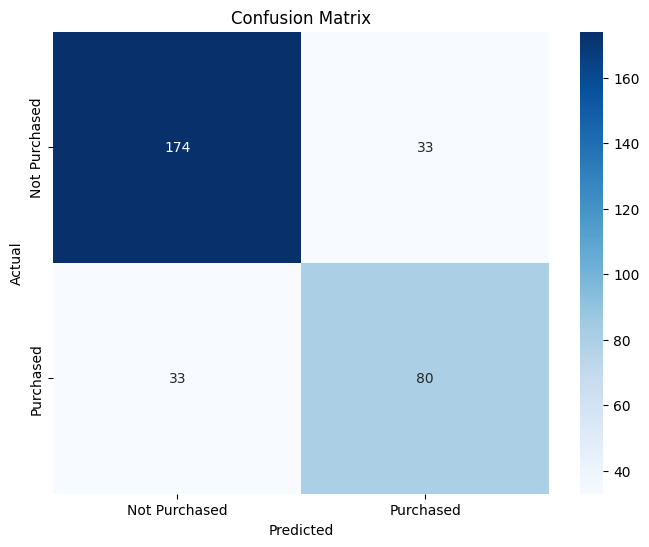

In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()